## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

##### Input variables X

In [4]:
DX1 = df.drop(columns=['math_score'],axis=1) # for math score prediction
DX2 = df.drop(columns=['reading_score'],axis=1) # for reading score prediction
DX3 = df.drop(columns=['writing_score'],axis=1) # for writing score prediction
df2 = df.copy()
df2['average_score'] = (df2['math_score'] + df2['reading_score'] + df2['writing_score'])/3
df2=df2.drop(columns=['math_score', 'reading_score', 'writing_score'],axis=1)
DX4 = df2.drop(columns=['average_score'],axis=1) # for average score prediction

# x1 for math
# x2 for reading
# x3 for writing
# x4 for average

In [5]:
# df.head()
df2.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,average_score
0,female,group B,bachelor's degree,standard,none,72.666667
1,female,group C,some college,standard,completed,82.333333
2,female,group B,master's degree,standard,none,92.666667
3,male,group A,associate's degree,free/reduced,none,49.333333
4,male,group C,some college,standard,none,76.333333


In [6]:
# DX1.head()
# DX2.head()
# DX3.head()
DX4.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


#### Categories in categorical features

In [7]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


##### Output variables Y

In [8]:
y1 = df['math_score']
y2 = df['reading_score']
y3 = df['writing_score']
y4 = df2['average_score']

# y1 for math
# y2 for reading
# y3 for writing
# y4 for average

#### Transformer pipeline

In [9]:
# Create Column Transformer with 3 types of transformers
num_features1 = DX1.select_dtypes(exclude="object").columns
cat_features1 = DX1.select_dtypes(include="object").columns

num_features2 = DX2.select_dtypes(exclude="object").columns
cat_features2 = DX2.select_dtypes(include="object").columns

num_features3 = DX3.select_dtypes(exclude="object").columns
cat_features3 = DX3.select_dtypes(include="object").columns

num_features4 = DX4.select_dtypes(exclude="object").columns
cat_features4 = DX4.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor1 = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features1),
         ("StandardScaler", numeric_transformer, num_features1),        
    ]
)

preprocessor2 = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features2),
         ("StandardScaler", numeric_transformer, num_features2),        
    ]
)

preprocessor3 = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features3),
         ("StandardScaler", numeric_transformer, num_features3),        
    ]
)

preprocessor4 = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features4),
         ("StandardScaler", numeric_transformer, num_features4),        
    ]
)

In [10]:
X1 = preprocessor1.fit_transform(DX1)
X2 = preprocessor2.fit_transform(DX2)
X3 = preprocessor3.fit_transform(DX3)
X4 = preprocessor4.fit_transform(DX4)

In [11]:
X4.shape

(1000, 17)

#### Train - Test Split

In [12]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.2,random_state=42)
# X1_train.shape, X1_test.shape

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2,random_state=42)
# X2_train.shape, X2_test.shape

X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3,test_size=0.2,random_state=42)
# X3_train.shape, X3_test.shape

X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4,test_size=0.2,random_state=42)
X4_train.shape, X4_test.shape

((800, 17), (200, 17))

#### Create an Evaluate Function to give all metrics after model Training

In [13]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    # mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

#### Training the models 1 through 4 and evaluating their performance

In [23]:
import copy

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list1 = []
r2_list2 = []
r2_list3 = []
r2_list4 = []

print('Model 1: math_score prediction')
print('Model 2: reading_score prediction')
print('Model 3: writing_score prediction')
print('Model 4: average_score prediction')
print('*'*35)
print('\n')

for i in range(len(list(models))):
    model1 = copy.deepcopy(list(models.values())[i])
    model1.fit(X1_train, y1_train) # Train model 1 for math_score

    model2 = copy.deepcopy(list(models.values())[i])
    model2.fit(X2_train, y2_train) # Train model 2 for reading_score

    model3 = copy.deepcopy(list(models.values())[i])
    model3.fit(X3_train, y3_train) # Train model 3 for writing_score

    model4 = copy.deepcopy(list(models.values())[i])
    model4.fit(X4_train, y4_train) # Train model 4 for average_score

    # Make predictions
    y_train_pred1 = model1.predict(X1_train)
    y_test_pred1 = model1.predict(X1_test)

    y_train_pred2 = model2.predict(X2_train)
    y_test_pred2 = model2.predict(X2_test)

    y_train_pred3 = model3.predict(X3_train)
    y_test_pred3 = model3.predict(X3_test)

    y_train_pred4 = model4.predict(X4_train)
    y_test_pred4 = model4.predict(X4_test)

    # Evaluate Train and Test dataset
    model_train_mae1, model_train_rmse1, model_train_r2_1 = evaluate_model(y1_train, y_train_pred1)
    model_test_mae1, model_test_rmse1, model_test_r2_1 = evaluate_model(y1_test, y_test_pred1)

    model_train_mae2 , model_train_rmse2, model_train_r2_2 = evaluate_model(y2_train, y_train_pred2)
    model_test_mae2, model_test_rmse2, model_test_r2_2 = evaluate_model(y2_test, y_test_pred2)

    model_train_mae3 , model_train_rmse3, model_train_r2_3 = evaluate_model(y3_train, y_train_pred3) 
    model_test_mae3 , model_test_rmse3, model_test_r2_3 = evaluate_model(y3_test, y_test_pred3)

    model_train_mae4 , model_train_rmse4, model_train_r2_4 = evaluate_model(y4_train, y_train_pred4)
    model_test_mae4 , model_test_rmse4, model_test_r2_4 = evaluate_model(y4_test, y_test_pred4)

    print('*'*35)
    print(list(models.keys())[i])
    print('*'*35)
    print('\n')
    model_list.append(list(models.keys())[i])    
    # Model 1 performance for Training set
    print('Model 1 performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse1))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae1))
    print("- R2 Score: {:.4f}".format(model_train_r2_1))
    print('----------------------------------')

    # Model 1 performance for Test set
    print('Model 1 performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse1))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae1))
    print("- R2 Score: {:.4f}".format(model_test_r2_1))
    print('\n')
    print('----------------------------------')
    print('\n')

    # Model 2 performance for Training set
    print('Model 2 performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse2))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae2))
    print("- R2 Score: {:.4f}".format(model_train_r2_2))
    print('----------------------------------')

    # Model 2 performance for Test set
    print('Model 2 performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse2))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae2))
    print("- R2 Score: {:.4f}".format(model_test_r2_2))
    print('\n')
    print('----------------------------------')
    print('\n')

    # Model 3 performance for Training set
    print('Model 3 performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse3))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae3))
    print("- R2 Score: {:.4f}".format(model_train_r2_3))
    print('----------------------------------')

    # Model 3 performance for Test set
    print('Model 3 performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse3))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae3))
    print("- R2 Score: {:.4f}".format(model_test_r2_3))
    print('\n')
    print('----------------------------------')
    print('\n')

    # Model 4 performance for Training set
    print('Model 4 performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse4))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae4))
    print("- R2 Score: {:.4f}".format(model_train_r2_4))
    print('----------------------------------')

    # Model 4 performance for Test set
    print('Model 4 performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse4))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae4))
    print("- R2 Score: {:.4f}".format(model_test_r2_4))
    print('\n')
    print('----------------------------------')
    print('\n')

    r2_list1.append(model_test_r2_1)
    r2_list2.append(model_test_r2_2)
    r2_list3.append(model_test_r2_3)
    r2_list4.append(model_test_r2_4)

Model 1: math_score prediction
Model 2: reading_score prediction
Model 3: writing_score prediction
Model 4: average_score prediction
***********************************


***********************************
Linear Regression
***********************************


Model 1 performance for Training set
- Root Mean Squared Error: 5.3293
- Mean Absolute Error: 4.2715
- R2 Score: 0.8740
----------------------------------
Model 1 performance for Test set
- Root Mean Squared Error: 5.4252
- Mean Absolute Error: 4.2222
- R2 Score: 0.8790


----------------------------------


Model 2 performance for Training set
- Root Mean Squared Error: 3.8735
- Mean Absolute Error: 3.1268
- R2 Score: 0.9282
----------------------------------
Model 2 performance for Test set
- Root Mean Squared Error: 4.3142
- Mean Absolute Error: 3.4968
- R2 Score: 0.9177


----------------------------------


Model 3 performance for Training set
- Root Mean Squared Error: 3.3790
- Mean Absolute Error: 2.7115
- R2 Score: 0.94

### Results

#### Result set 1

In [29]:
Results1 = pd.DataFrame(list(zip(model_list, r2_list1)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
print('*'*35)
print("Results set 1")
print('*'*35)
Results1

***********************************
Results set 1
***********************************


,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
8,AdaBoost Regressor,0.853581
7,CatBoosting Regressor,0.851632
5,Random Forest Regressor,0.849233
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
4,Decision Tree,0.751868


#### Result set 2

In [30]:
Results2 = pd.DataFrame(list(zip(model_list, r2_list2)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
print('*'*35)
print("Results set 2")
print('*'*35)
Results2

***********************************
Results set 2
***********************************


,Model Name,R2_Score
2,Ridge,0.918184
0,Linear Regression,0.917747
5,Random Forest Regressor,0.910148
7,CatBoosting Regressor,0.907223
1,Lasso,0.905059
8,AdaBoost Regressor,0.900761
6,XGBRegressor,0.896433
3,K-Neighbors Regressor,0.837096
4,Decision Tree,0.818878


#### Result set 3

In [31]:
Results3 = pd.DataFrame(list(zip(model_list, r2_list3)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
print('*'*35)
print("Results set 3")
print('*'*35)
Results3

***********************************
Results set 3
***********************************


,Model Name,R2_Score
2,Ridge,0.938143
0,Linear Regression,0.937717
7,CatBoosting Regressor,0.916795
5,Random Forest Regressor,0.915834
6,XGBRegressor,0.915462
8,AdaBoost Regressor,0.910013
1,Lasso,0.899336
3,K-Neighbors Regressor,0.880506
4,Decision Tree,0.852334


#### Result set 4

In [32]:
Results4 = pd.DataFrame(list(zip(model_list, r2_list4)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)
print('*'*35)
print("Results set 1")
print('*'*35)
Results4

***********************************
Results set 1
***********************************


,Model Name,R2_Score
0,Linear Regression,0.162172
2,Ridge,0.161946
8,AdaBoost Regressor,0.109963
1,Lasso,0.068120
5,Random Forest Regressor,-0.027541
7,CatBoosting Regressor,-0.044386
3,K-Neighbors Regressor,-0.047842
4,Decision Tree,-0.065791
6,XGBRegressor,-0.070459


## Ridge Regression

In [48]:
ridge_model = Ridge(fit_intercept=True)
ridge_model = ridge_model.fit(X2_train, y2_train)
y_pred = ridge_model.predict(X2_test)
score = r2_score(y2_test, y_pred)*100
print(" Accuracy of the Ridge Regression model is %.2f" %score)
# print(" Accuracy of the Ridge Regression model is {:.2f}".format(score))

 Accuracy of the Ridge Regression model is 91.82
 Accuracy of the Ridge Regression model is 91.82


## Plot predictions vs Actual values

Text(0.5, 1.0, 'Model 2: Reading score prediction using Ridge Regression\n')

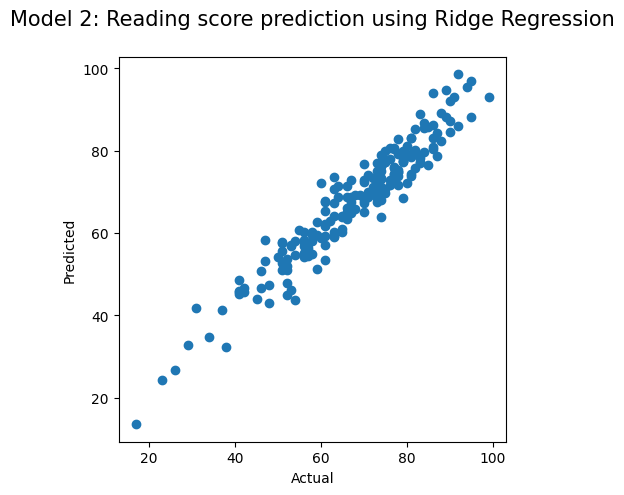

In [56]:
plt.figure(figsize=(5,5))
plt.scatter(y2_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Model 2: Reading score prediction using Ridge Regression\n', fontsize=15)

Text(0.5, 1.0, 'Regression plot for\nModel 2: Reading score prediction using Ridge Regression\n')

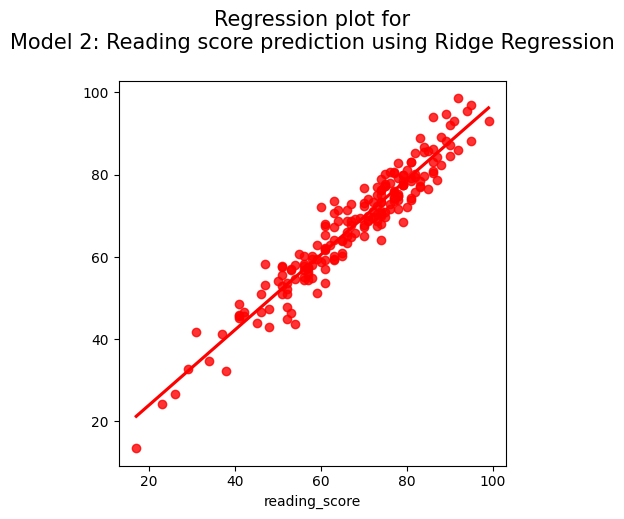

In [58]:
plt.figure(figsize=(5,5))
sns.regplot(x=y2_test,y=y_pred,ci=None,color ='red');
plt.title('Regression plot for\nModel 2: Reading score prediction using Ridge Regression\n', fontsize=15)

#### Difference between Actual and Predicted Values

In [59]:
pred_df=pd.DataFrame({'Actual Value':y2_test,'Predicted Value':y_pred,'Difference':y2_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,86,86.255663,-0.255663
737,66,71.312863,-5.312863
740,73,72.391843,0.608157
660,77,75.836583,1.163417
411,83,78.344116,4.655884
...,...,...,...
408,57,56.356759,0.643241
332,56,54.275172,1.724828
208,81,78.562651,2.437349
613,77,74.270701,2.729299
